<a href="https://colab.research.google.com/github/parasgulati8/Data-Analysis/blob/master/TDI_job_listing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
ls /content/drive/My\ Drive/TDI\ Datasets/

BPD_Part_1_Victim_Based_Crime_Data.csv
Parking_Citations.csv
temp_datalab_records_job_listings.csv
temp_datalab_records_linkedin_company.csv
temp_datalab_records_social_facebook.csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv("/content/drive/My Drive/TDI Datasets/temp_datalab_records_job_listings.csv", nrows=1000000 )

# Let's see how the data looks like ...

In [9]:
data.head()

,dataset_id,listing_id,domain,as_of_date,title,url,brand,category,locality,region,country,number_of_openings,date_added,date_updated,posted_date,location_string,description,entity_id,city_lat,city_lng,cusip,isin
0,57644,https://careers-asburyauto.icims.com/jobs/15382/slug/job?in_iframe=1,careers-asburyauto.icims.com,2018-05-01,Automotive Technician Coggin Honda St. Augustine,https://careers-asburyauto.icims.com/jobs/15382/slug/job?in_iframe=1,Asbury Automotive Group,NaN,St. Augustine,FL,USA,NaN,2018-05-01 02:15:18.856241+00,2018-05-01 02:15:18.856256+00,2018-04-12,"St. Augustine, FL, US",NaN,NaN,NaN,NaN,NaN,NaN
1,2334936,http://jobs.jcp.com/jobs/2540326-window-commission-associate-pheasant-lane-mall,jobs.jcp.com,2018-05-01,Window Commission Associate - Pheasant Lane Mall,http://jobs.jcp.com/jobs/2540326-window-commission-associate-pheasant-lane-mall,NaN,NaN,Nashua,New Hampshire,USA,NaN,2018-05-01 16:18:00.864272+00,2018-05-01 16:18:00.864287+00,NaN,"NH-Nashua-Nashua, NH",NaN,NaN,NaN,NaN,NaN,NaN
2,57644,https://careers-asburyauto.icims.com/jobs/14869/slug/job?in_iframe=1,careers-asburyauto.icims.com,2018-05-01,Part Time Receptionist / Nights and Weekends / Nalley Ford Sandy Springs,https://careers-asburyauto.icims.com/jobs/14869/slug/job?in_iframe=1,Asbury Automotive Group,NaN,Atlanta,GA,USA,NaN,2018-05-01 02:15:18.85616+00,2018-05-01 02:15:18.856179+00,2018-03-05,"Atlanta, GA, US",NaN,NaN,NaN,NaN,NaN,NaN
3,2335348,https://sci.jobs/york-pa/maintenance-worker/135D08D60C864713B141CDF683200F5F/job/,sci.jobs,2018-05-01,Maintenance Worker,https://sci.jobs/york-pa/maintenance-worker/135D08D60C864713B141CDF683200F5F/job/,NaN,NaN,York,Pennsylvania,USA,NaN,2018-05-01 23:19:01.421894+00,2018-05-01 23:19:01.421909+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,57644,https://careers-asburyauto.icims.com/jobs/15428/slug/job?in_iframe=1,careers-asburyauto.icims.com,2018-05-01,Service Technician & Used Technician McDavid Plano Acura INTERVIEW NOW,https://careers-asburyauto.icims.com/jobs/15428/slug/job?in_iframe=1,Asbury Automotive Group,NaN,Plano,TX,USA,NaN,2018-05-01 02:15:18.85602+00,2018-05-01 02:15:18.856035+00,2018-04-16,"Plano, TX, US",NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.describe()

,dataset_id,number_of_openings,description,entity_id,city_lat,city_lng,cusip,isin
count,1.000000e+06,2045.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.265949e+06,1.067971,NaN,NaN,NaN,NaN,NaN,NaN
std,8.164878e+05,1.091587,NaN,NaN,NaN,NaN,NaN,NaN
min,5.764400e+04,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.682120e+05,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.021000e+05,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.305320e+06,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,2.335555e+06,25.000000,NaN,NaN,NaN,NaN,NaN,NaN


**I can see a lot of NaNs in the dataset. First see how many NaNs each column has.**

In [11]:
data.isna().sum()

dataset_id                  0
listing_id                  0
domain                      0
as_of_date                  0
title                    1064
url                         0
brand                  840821
category               773032
locality               448252
region                 482527
country                437744
number_of_openings     997955
date_added                  0
date_updated                0
posted_date            510452
location_string        224757
description           1000000
entity_id             1000000
city_lat              1000000
city_lng              1000000
cusip                 1000000
isin                  1000000
dtype: int64

**Findings**

1) All of the last six columns are NaNs. 

2) Most of the 'brand', 'category', and 'number of openings' are NaN.

## Finding the number total number of countries in dataset and the number of job openings in each country.

In [15]:
data['country'].value_counts()

USA    466971
CAN     13402
IND     12285
GBR     11488
CHN      9703
DEU      5446
MEX      3820
AUS      2688
IRL      2542
BRA      2121
NLD      1996
POL      1987
MYS      1965
JPN      1820
PHL      1722
FRA      1686
ESP      1480
TWN      1435
ITA      1130
CHE       990
ISR       905
THA       777
BEL       762
ARG       713
HUN       710
CRI       702
ROU       693
RUS       671
ARE       623
SGP       534
TUR       518
SWE       510
KOR       499
BGR       446
IDN       426
HKG       413
SAU       368
COL       366
VNM       344
ZAF       335
AUT       294
CHL       228
KWT       224
NZL       209
CZE       197
PRI       187
AFG       148
DNK       139
LTU       138
EGY       136
LUX       135
PAK       133
UKR       128
PRT       116
SVN       108
TUN        98
NOR        89
GRC        87
VEN        84
LKA        81
FIN        81
PER        80
EST        72
LBN        72
IRN        66
DOM        56
SRB        51
HRV        44
PAN        43
TTO        43
QAT        42
ZMB   

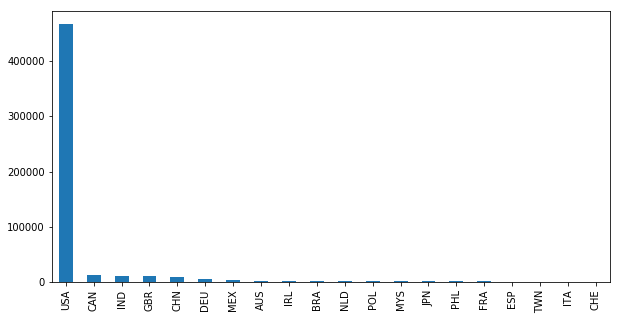

In [18]:
#plotting the number of jobs n top 20 countries in the world
data['country'].value_counts().head(20).plot.bar(figsize=(10,5))

**Conclusion**

In this dataset the number of job openings in USA is far more than any other nation. Lets explore the jobs in USA only.

In [0]:
dataset = data.copy()
dataset = dataset[dataset.country == 'USA']

In [0]:
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# dataset.describe()

In [8]:
#Finding unique values in this dataset 
dataset.nunique()

dataset_id              1282
listing_id            376962
domain                  1218
as_of_date                 2
title                 201511
url                   376962
brand                   1631
category                1908
locality                8302
region                   260
country                    1
number_of_openings         9
date_added            466970
date_updated          466969
posted_date              904
location_string        38759
description                0
entity_id                  0
city_lat                   0
city_lng                   0
cusip                      0
isin                       0
dtype: int64

**Let's see what are the most popular cities in terms of job opportunities. We will limit the plot to top 20 regions in USA.**

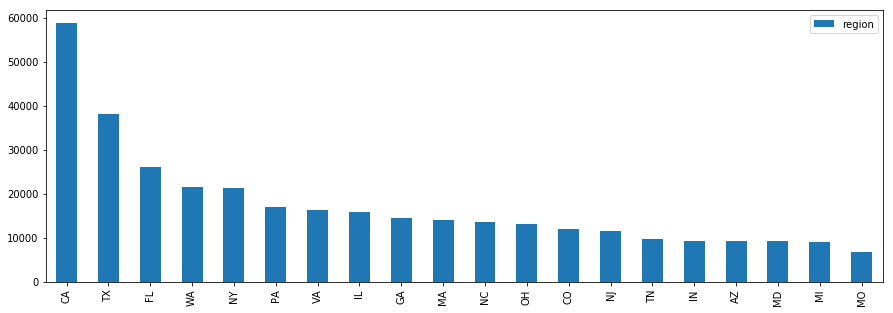

In [112]:
pd.DataFrame(dataset['region'].value_counts()).head(20).plot.bar(figsize = (15,5))

**Looks like the California is the highest contributor to job market.  Now I want to dive more deeper in each region (top 5 actually) and see what are the job trends in each of them**

In [0]:
cali = dataset[dataset.region == 'CA']
tx = dataset[dataset.region == 'TX']
fl = dataset[dataset.region == 'FL']
wa = dataset[dataset.region == 'WA']
ny = dataset[dataset.region == 'NY']


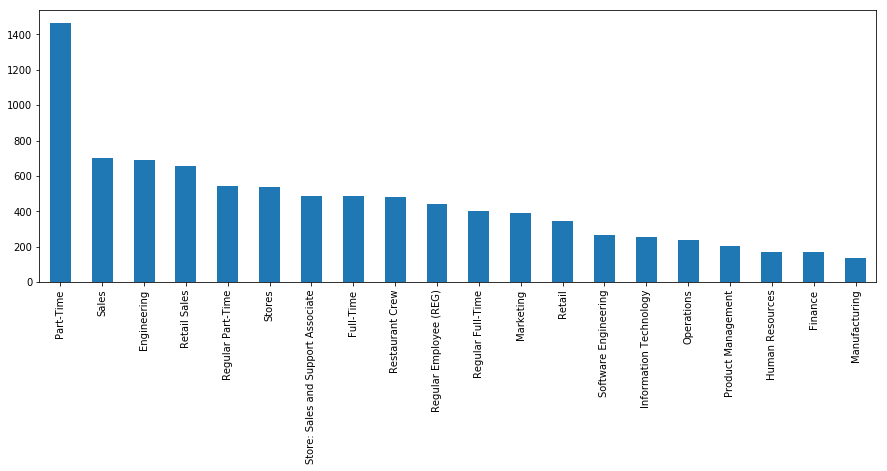

In [113]:
cali['category'].value_counts().head(20).plot.bar(figsize = (15,5))

**Looks like there are more jobs in Sales and Engineering than in Finances and Manufacturing in California. What about the other regions like Texas, Florida, New York ?**

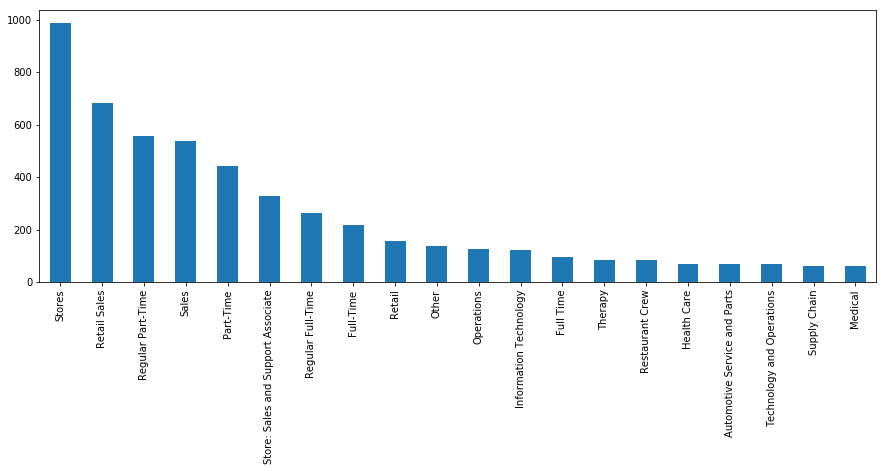

In [114]:
#Top 20 job categories in Texas 
tx['category'].value_counts().head(20).plot.bar(figsize = (15,5))

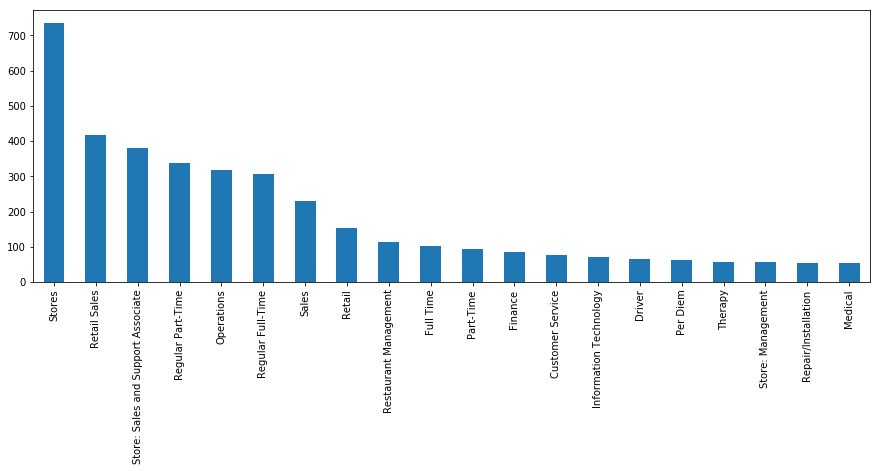

In [115]:
#Top 20 job categories in Florida
fl['category'].value_counts().head(20).plot.bar(figsize = (15,5))

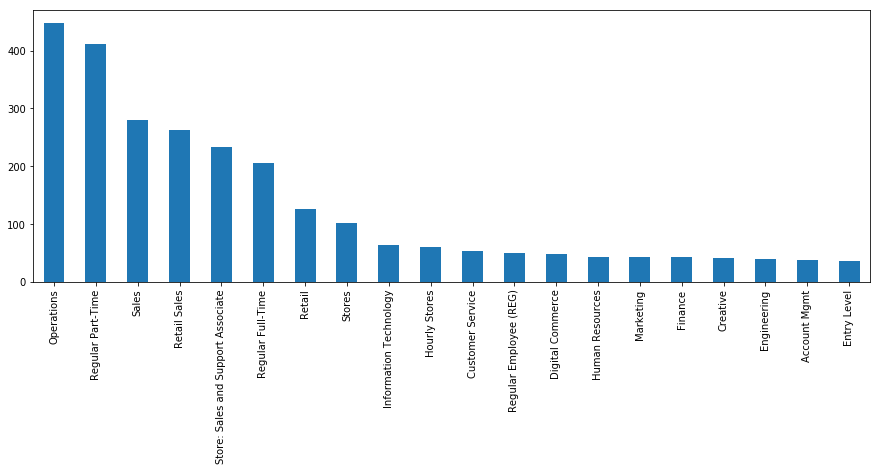

In [116]:
#Top 20 job categories in New York
ny['category'].value_counts().head(20).plot.bar(figsize = (15,5))

**Conclusion**

Florida and Texas has more jobs in Stores and Retail Sales while in New York Operations, regular Part-Time and Sales are more dominant

## **What are the most common job titles in all these regions**

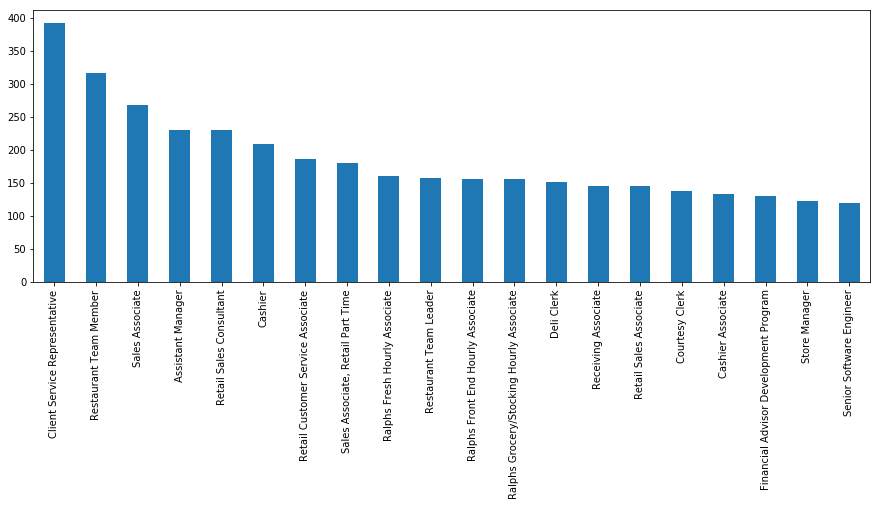

In [117]:
#Top 20 job Job Titles in California
cali['title'].value_counts().head(20).plot.bar(figsize = (15,5))

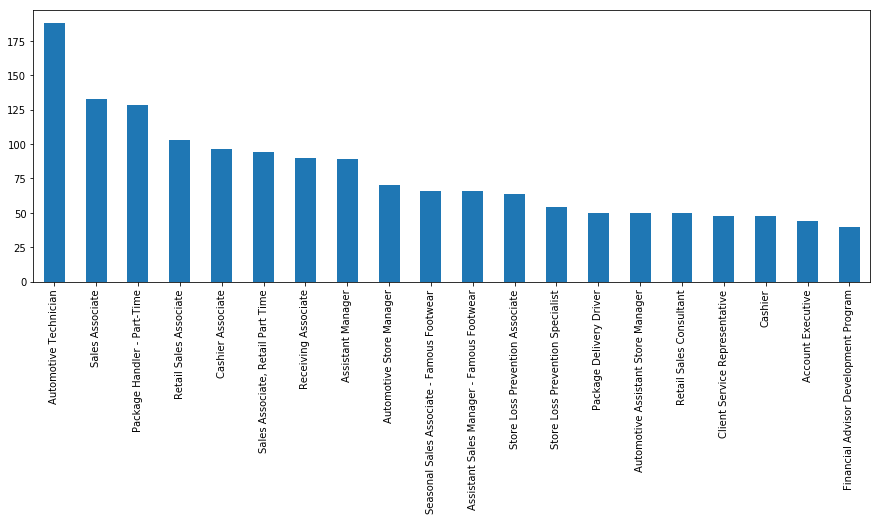

In [118]:
#Top 20 job Job Titles in New York
ny['title'].value_counts().head(20).plot.bar(figsize = (15,5))

# **Let's Explore the trend in job postings in California, Texas and New York. What months are these jobs posted the most.**

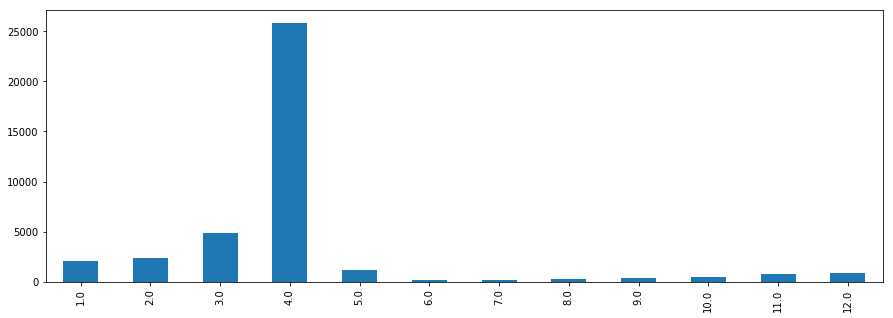

In [119]:
#Month-wise job postings in California
pd.to_datetime(cali['posted_date']).dt.month.value_counts().sort_index().plot.bar(figsize = (15,5))

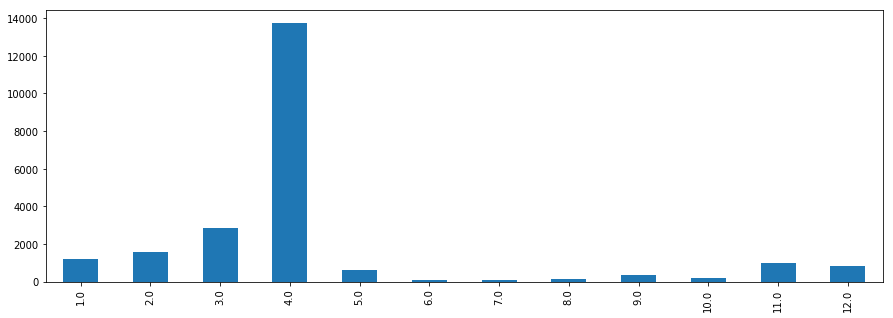

In [215]:
#Month-wise job postings in Texas
pd.to_datetime(tx['posted_date']).dt.month.value_counts().sort_index().plot.bar(figsize = (15,5))

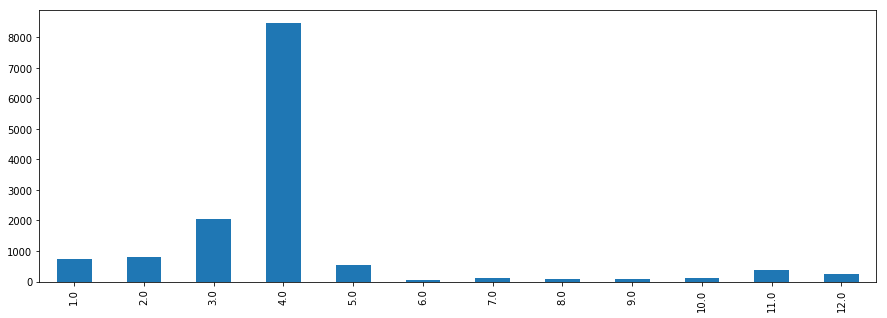

In [216]:
#Month-wise job postings in New York
pd.to_datetime(ny['posted_date']).dt.month.value_counts().sort_index().plot.bar(figsize = (15,5))

**Colclusion**

**No matter how does the job titles and categories vary in California and New York, they all follow the same trend while rolling out jobs**

# What are the companies in Califronia, New York and Florida that hire the most?

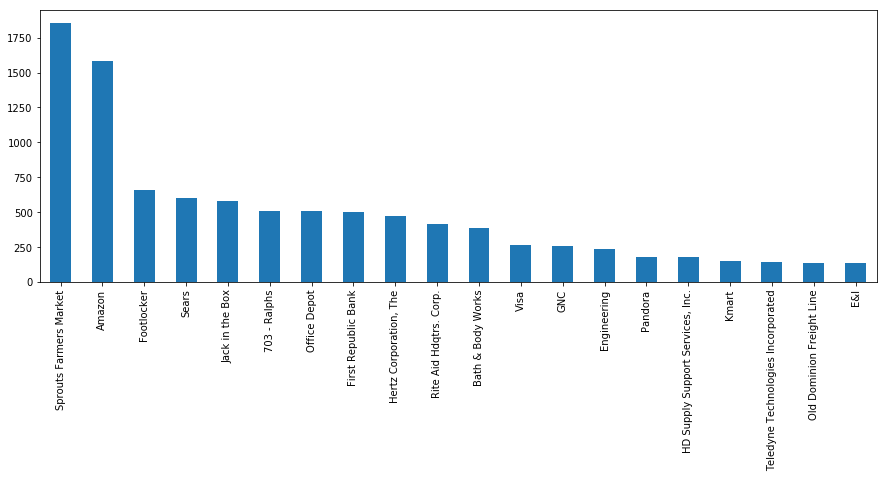

In [122]:
#Top 20 Companies Titles in California
cali['brand'].value_counts().head(20).plot.bar(figsize = (15,5))

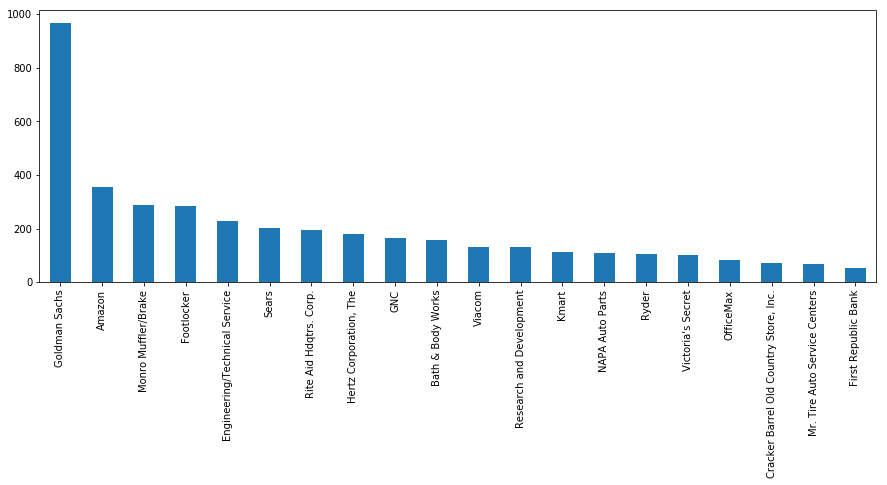

In [123]:
#Top 20 Companies Titles in NY
ny['brand'].value_counts().head(20).plot.bar(figsize = (15,5))

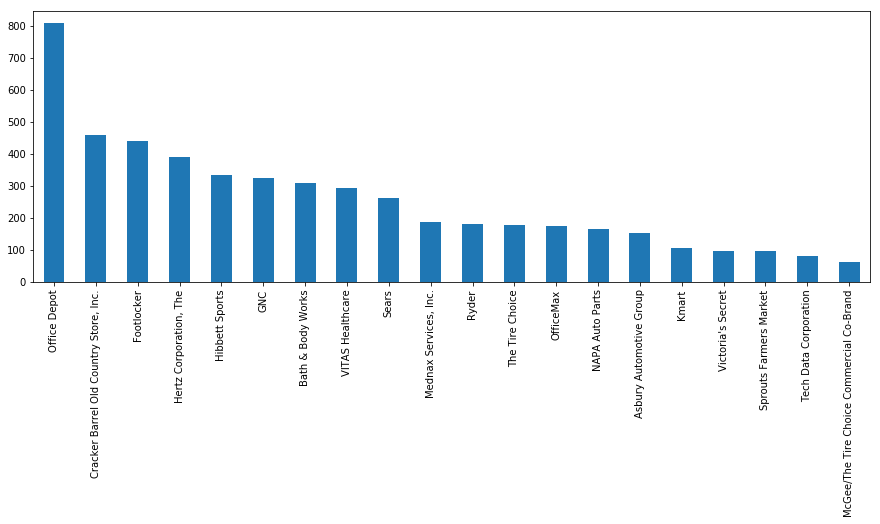

In [124]:
#Top 20 Companies Titles in Florida
fl['brand'].value_counts().head(20).plot.bar(figsize = (15,5))

##**Hmm.. All of these places have different mass recruiters. What about the whole USA ? Who recruits the most in whole America ?**

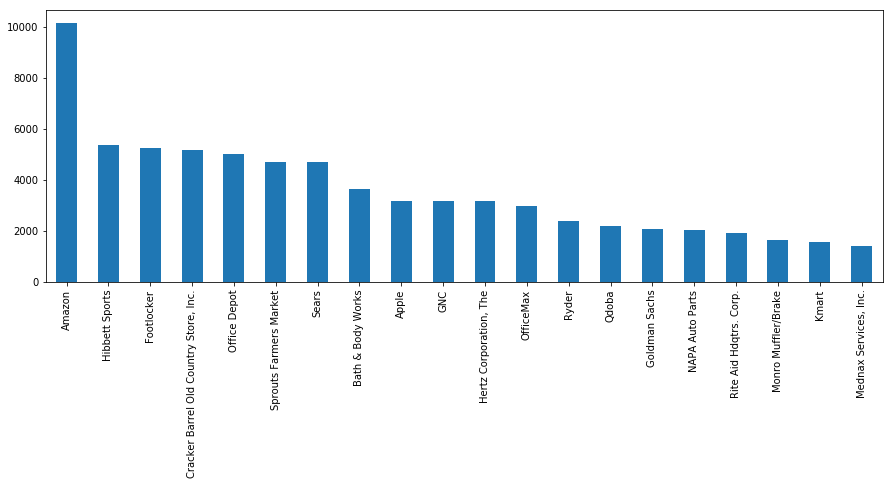

In [128]:
dataset['brand'].value_counts().head(20).plot.bar(figsize = (15,5))

**And the winner in 'Most Recruitments Across All States' is : Amazon**

## Where should I go if I want to find a job in Software engineering or Software Development ?

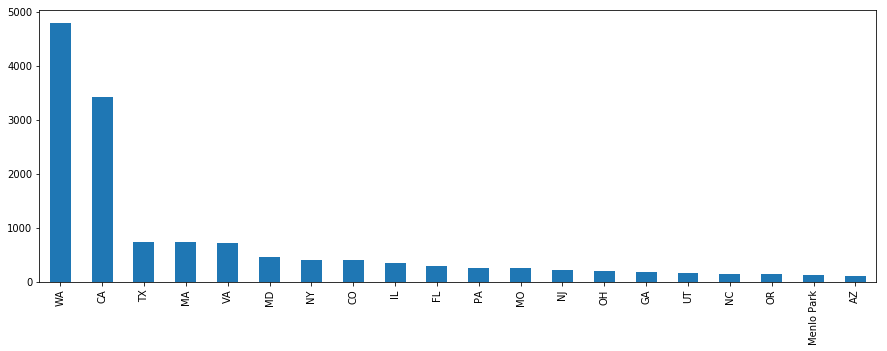

In [23]:
dataset.dropna(subset=['title'], axis=0, inplace=True)
dataset[(dataset['title'].str.contains('Software')) | (dataset['title'].str.contains('software'))]['region'].value_counts().head(20).plot.bar(figsize = (15,5))

##**Conclusion**
Washington ? and not California ? Thats something surprising, isn't it ?

Despite the huge overall job postings, I should move to Washington for a role in Softwares.

# Where should I go if I want to find a job in Hardware?

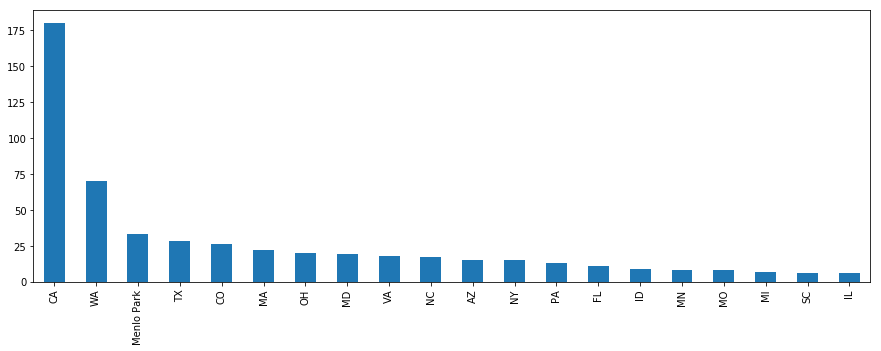

In [24]:
dataset[(dataset['title'].str.contains('Hardware')) | (dataset['title'].str.contains('hardware'))]['region'].value_counts().head(20).plot.bar(figsize = (15,5))

##**Conclusion**

As expected, the most hardware related jobs are in California and CA leads with a huge margin. 

# Where should I go if I want to find a job in Legal?

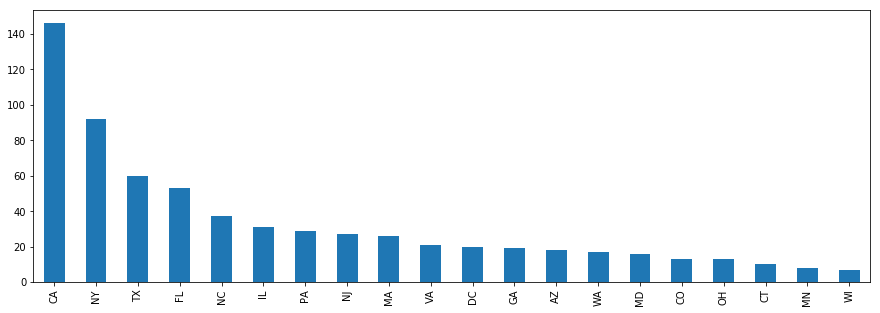

In [25]:
dataset[(dataset['title'].str.contains('Legal')) | (dataset['title'].str.contains('legal'))]['region'].value_counts().head(20).plot.bar(figsize = (15,5))

##**Conclusion**

I always had the presumption that all the Legal jobs must be in New York. I guess I am too much influenced with 'Suits'. California leads the Legal battle, followed by New York.

# I am more interested in Data Science and Machine Learning. Where are the jobs in this field ?

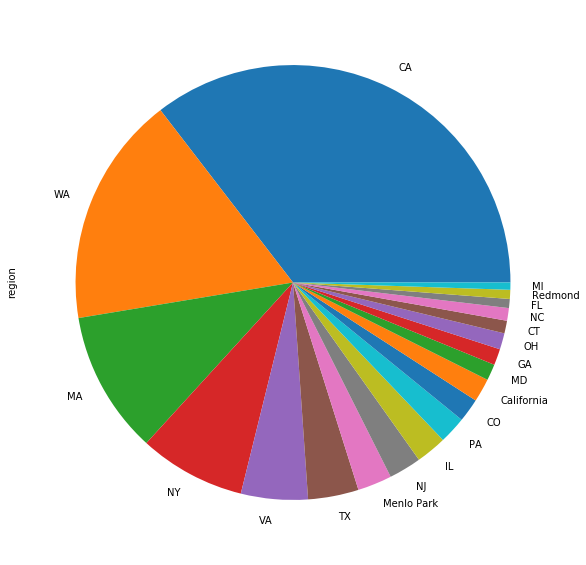

In [211]:
dataset[(dataset['title'].str.contains('Data Science')) | ((dataset['title'].str.contains('Machine Learning')))]['region'].value_counts().head(20).plot.pie(figsize = (10,10))

**California, Massachusetts, New York.** 

**Noted!**

#Who hires the most for Data Science and Machine Learning jobs?

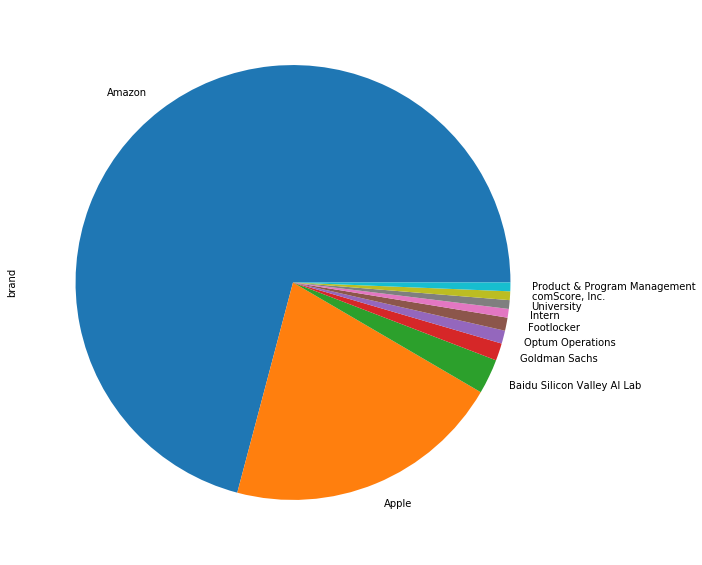

In [198]:
dataset[(dataset['title'].str.contains('Data Science')) | ((dataset['title'].str.contains('Machine Learning')))]['brand'].value_counts().head(10).plot.pie(figsize = (10,10)) #bar(figsize = (15,5))

**Conclusion**

Okay, that was unexpected. Where is google and Facebook ?

Amazon is hiring all the Data Scientists and Machine Learning Engineers ? I wonder what are they upto.